In [1]:
# load the package
using HomotopyContinuation
using Plots
using Distributions
using Pandas

In [18]:
b = [2; 2.5; 3]
w = [1.3; 1.5; 1.2]
a1e = 0.2

0.2

In [70]:
f

1.69*x1^2 + 2.25*x2^2 + 1.44*x3^2 + (-0.2 + a1)^2

In [76]:
@var x1, x2, x3, a1, a2, a3
@var λ[1:3];
h1 = 0.1x1*a2+0.8x1*a3+b[1]-a1
h2 = x2*a3+b[2]-a2
h3 = 0.1x3*a1+0.8x3*a2+b[3]-a3
f = (a1-a1e)^2+([x1^2 x2^2 x3^2]*w.^2)[1];
vars = [x1, x2, x3, a1, a2, a3]
h = [h1, h2, h3]

3-element Vector{Expression}:
 2.0 - a1 + 0.1*x1*a2 + 0.8*x1*a3
                 2.5 - a2 + x2*a3
 3.0 - a3 + 0.1*x3*a1 + 0.8*x3*a2

In [77]:
J = differentiate(h, vars);
dfdx = differentiate(f, vars);

In [78]:
kkt = [dfdx - J'*λ; h];

In [79]:
Opt = System(kkt, variables = [vars; λ]);

In [80]:
res = solve(Opt)

Tracking 68 paths... 100%|██████████████████████████████| Time: 0:00:02
  # paths tracked:                  68
  # non-singular solutions (real):  52 (6)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         52 (6)


Result with 52 solutions
• 68 paths tracked
• 52 non-singular solutions (6 real)
• random_seed: 0x6a27d19b
• start_system: :polyhedral


In [81]:
real_sols = real_solutions(res);

In [88]:
evaluate.(f, vars=>real_sols[6][1:6])

0.5698273209859522

In [85]:
evaluate.(h, vars=>[-0.50, 0.047, 0.179, 0.489, 2.66, 3.39])

3-element Vector{Float64}:
  0.02200000000000002
 -0.0006700000000001427
 -0.00033490000000009623

In [90]:
DataFrame(real_sols)

,0,1,2,3,4,5,6,7,8
0,-103.434639,-50.184457,-21.532809,41.017663,-4.961686,0.148685,926.803038,-1518.846834,-468.326443
1,-86.265274,-110.152274,-68.584989,2.805401,-0.296461,0.025387,31230.347006,-19524.983093,-4554.284888
2,-199.947352,-14.113430,-0.156548,318.722263,-39.840275,2.999999,426.647714,-21.170152,-67946.881180
3,-0.256278,-7.999987,-0.157276,1.936064,3238.263202,-404.471052,-3.472126,0.089005,-0.000175
4,0.373990,-0.424271,-1.563783,1.842497,2.875866,-0.885910,-3.001575,2.155095,-1.812393
5,-0.507125,0.047480,0.178855,0.489936,2.660934,3.389500,-0.575641,0.063036,0.236531


In [8]:
@var x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20, x_21, x_22, x_23
@var λ[1:20];
h0=-0.5*x_1*x_21 - 0.9;
h1=0.8*x_10*x_13 + 0.2*x_17 + 0.5;
h2=0.7*x_1*x_8 - 1.0*x_15*x_19 - 0.9;
h3=0.7*x_12*x_15*x_17 + 0.1*x_14 - 0.4;
h4=-0.9*x_10*x_3 - 0.8*x_16 + 0.3;
h5=-0.2*x_15*x_7*x_8 + 1.0*x_2 + 1.0;
h6=0.4*x_11*x_5*x_8 - 0.2;
h7=-0.7*x_15*x_20 + 0.4;
h8=0.8*x_16*x_18 + 0.9*x_17*x_19 - 0.3;
h9=-0.4*x_16*x_3 + 0.2;
h10=-0.5*x_14*x_4 + 0.2*x_17*x_18*x_9 - 0.8*x_23 + 0.7;
h11=-0.1*x_0*x_3 - 0.3*x_17*x_9 - 0.7*x_20*x_23 + 0.6;
h12=-0.2*x_13*x_9 - 0.6*x_14*x_2 - 0.8;
h13=-0.6*x_1 + 0.3*x_18*x_9 + 0.9;
h14=0.3*x_22*x_5*x_8 + 0.9;
h15=0.9 - 0.1*x_6;
h16=-0.1*x_11*x_13 + 0.2;
h17=-0.1*x_10*x_15*x_7 + 0.5*x_8 + 0.1;
h18=0.5*x_18*x_5 + 0.4*x_23 + 0.9;
h19=-0.8*x_12*x_23 + 0.5;
vars=[x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20, x_21, x_22, x_23]
dfdx=[0, 0, 0, x_3, 0, 0, 0, 0, x_8, 0, 0, 0, 0, 0, 0, 0, 0, x_17, 0, 0, 0, 0, 0, x_23]
h=[h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19];

In [9]:
J = differentiate(h, vars);
kkt = [dfdx - J'*λ; h];

In [10]:
Opt = System(kkt, variables = [vars; λ]);

In [ ]:
res = solve(Opt)

Computing mixed cells... 3 	 Time: 12:36:07
  mixed_volume:  6

In [ ]:
real_sols = real_solutions(res);

In [73]:
real_sols[5]

13-element Vector{Float64}:
 -7.14496195261011
  0.2791438898153426
 29.62989894048818
  0.01792564307651001
 30.11729937328096
 -0.2785476176509625
  0.1
 13.190141001828461
  0.02387443812696063
  0.03307350709849108
  2.0217120243801827
  0.1
  0.1

In [84]:
0.1/real_sols[5][4]*real_sols[5][11]

11.2783235488464

In [85]:
h_1 = subs(h9, [x_0]=>[real_sols[4][1]])

0.553148927062142 - 0.4*x_3*x_10

In [86]:
h_2 = subs(h5, [x_2,x_7,x_9]=>real_sols[4][[3,8,10]])

-3.6421064850287 + 2.63372578836768*x_3*x_10

In [63]:
h11+h12

-0.0928781489093999 + 2.5629899*x_3*x_10

In [61]:
C1 = System(h, variables = vars,parameters = u);

In [95]:
res = solve(C1, target_parameters =[0.3,0.1,0.1]) 

Result with 30 solutions
• 30 paths tracked
• 30 non-singular solutions (8 real)
• random_seed: 0xfa7c2987
• start_system: :polyhedral


In [91]:
real_sols = real_solutions(res);

In [92]:
DataFrame(real_sols)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.000127,493.850296,10.559465,-0.468715,2.331720,-8.839504,0.5,7.142459,2475.315047,0.365245,3.733541,0.1,0.1
1,0.063350,-30.572741,10.474827,-0.470612,2.314037,-0.286846,0.5,7.106910,-4.997546,0.367355,3.752217,0.1,0.1
2,18.096732,-0.008478,2.895012,-0.712510,0.498511,-3.621196,0.5,3.028326,-0.041056,0.849895,8.805746,0.1,0.1
3,-19.603931,0.100811,5.216189,-1.068495,10.073148,-0.281109,0.5,-9.042642,-0.012692,0.140521,-2.948991,0.1,0.1


## Optimization

In [5]:
J = differentiate(h, vars);

In [6]:
kkt = [dfdx - J'*λ; h];

In [7]:
Opt = System(kkt, variables = [vars; λ]);

In [8]:
opt = solve(Opt)

Tracking 105 paths... 100%|█████████████████████████████| Time: 0:00:19
  # paths tracked:                  105
  # non-singular solutions (real):  77 (11)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         77 (11)


Result with 77 solutions
• 105 paths tracked
• 77 non-singular solutions (11 real)
• random_seed: 0xe2abfb2a
• start_system: :polyhedral


In [80]:
real_sols = real_solutions(opt);

In [93]:
real_sols[8][14:end]

10-element Array{Float64,1}:
 -8.070065164468728
  0.0
 -0.6702017313781344
 10.56294540001432
 -7.3095397502722275
 -1.028448275698785
 -1.7702757088371428
 -4.385502221807738
  8.026313043233805e-32
 29.89201695117508

In [82]:
xs = map(p -> p[1:13], real_sols);

In [84]:
xs;

In [88]:
valid = [all(abs.(elt) .> 0.01) for elt in xs];

In [91]:
objs = [(idx, sum([elt[idx-9]^2 for idx in [11,12,13,14,15,17,18,19]]), valid[idx]) for (idx,elt) in enumerate(xs)]

11-element Array{Tuple{Int64,Float64,Bool},1}:
 (1, 160.41630040592673, 1)
 (2, 54.76560267575184, 1)
 (3, 59.10746811184429, 1)
 (4, 60.70890042689245, 1)
 (5, 54.666471431212024, 1)
 (6, 44.16618337054458, 1)
 (7, 2.9906175743414955e6, 0)
 (8, 37.505405294327296, 1)
 (9, 159.79450875202195, 1)
 (10, 39.44023437378726, 1)
 (11, 43.89506639058234, 1)

In [92]:
xs[8]

13-element Array{Float64,1}:
  -1.5000000000000002
  -1.5861574138526022
  -2.9039010778487695
  -1.557109343272545
  -0.06304544500227817
   2.1641611497053543
 -33.96860313514649
  -1.1243308506045717
   4.1323721705044045
   1.050757416704636
   2.5
   0.7463699802115709
  -8.562193271133395

In [41]:
objs = [elt[9]^2 for elt in xs if elt[9]^2<=1];

In [84]:
res = hcat([elt[[3,8,10]] for elt in xs if elt[9]^2<=1]...)

3×41 Array{Float64,2}:
  1.08771   -2.77318   -0.145443  …  0.482864  -2.42381   -0.543099
 -0.63979   -2.05364   -0.607108     1.34852   -2.17316   -0.695442
  0.960985   0.688615   0.842597     0.707536   0.912763   0.859671

In [87]:
dist, idx = findmin(objs)

(4.787341467137889e-5, 41)

In [88]:
res[:, idx]

3-element Array{Float64,1}:
 -0.5430990106328428
 -0.6954415160549715
  0.8596714170233678

In [85]:
[minimum.(eachrow(res)) maximum.(eachrow(res))]

3×2 Array{Float64,2}:
 -2.77826  1.08771
 -8.4735   1.43142
 -1.23403  1.16269

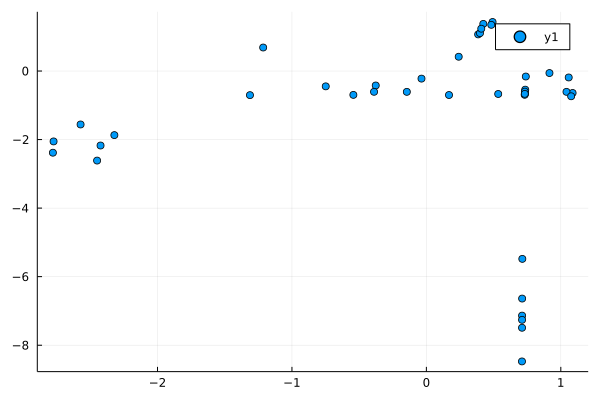

In [86]:
scatter(res[1,:], res[2,:])

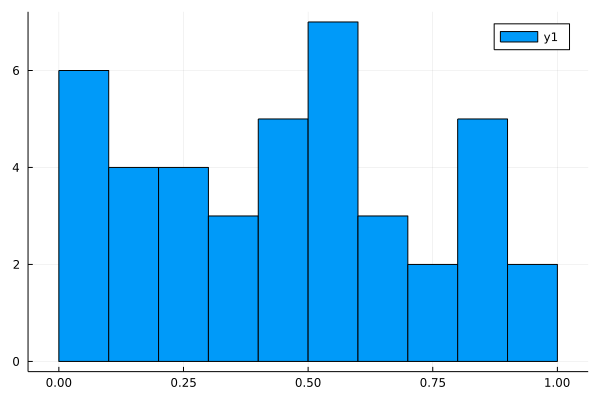

In [43]:
histogram(objs, nbins=10)

In [178]:
dfdx2=[0, 0, 0, 0, 0, 0, x_16, 0, 0, 0, 0, x_21, 0]
kkt2 = [dfdx2 + J'*λ; h];

In [179]:
C2 = System(kkt2, variables = [vars;λ]);

In [180]:
res = solve(C2) 

Tracking 439 paths... 100%|█████████████████████████████| Time: 0:00:12
  # paths tracked:                  439
  # non-singular solutions (real):  173 (39)
  # singular endpoints (real):      56 (0)
  # total solutions (real):         229 (39)


Result with 229 solutions
• 439 paths tracked
• 173 non-singular solutions (39 real)
• 56 singular solutions (0 real)
• random_seed: 0xbee6112d
• start_system: :polyhedral
• multiplicity table of singular solutions:
╭───────┬───────┬────────┬────────────╮
│ mult. │ total │ # real │ # non-real │
├───────┼───────┼────────┼────────────┤
│   1   │  56   │   0    │     56     │
╰───────┴───────┴────────┴────────────╯


In [181]:
real_sols = real_solutions(res);

In [182]:
xs = map(p -> p[1:13], real_sols);
xsA = hcat(xs...)
objs = xsA[7,:].^2+xsA[12,:].^2

39-element Array{Float64,1}:
      3.9798409406126463e8
   1477.972979487994
 340324.0457878663
 301175.34191074246
      1.0016789074413521
 995960.8625076213
      0.0039051512233756807
   6456.586059233902
    927.0238111397424
      5.822119577871414e9
      8.812508691929475e8
     44.614786171692444
    957.4075748176444
      ⋮
      1.2647285915415956
      2.592165752192883e7
   8577.062992018235
      1.6678075485219068
      5.006444008461111
      6.129213854597762
    357.63354154388736
     66.55817634126215
      3.7845127497033504
 116408.55872691056
     50.08551769421408
   9238.691256075599

In [184]:
res = hcat([elt[[3,8,10]] for elt in xs if norm(elt)<=100]...)

3×16 Array{Float64,2}:
 0.377306   0.443338   0.898804  -2.42246  …   0.470309   0.73501   3.87402
 1.10114   -0.845152  -0.509445  -2.67582     -0.535965  -0.520315  1.94902
 0.408425   1.12216    0.742456   1.16716      0.449941   0.730407  0.868881

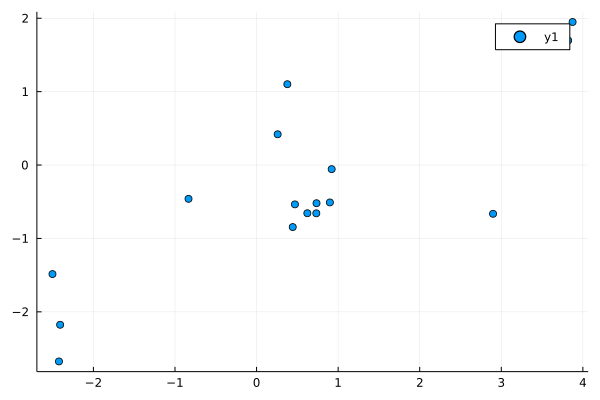

In [185]:
scatter(res[1,:], res[2,:])

In [186]:
dist, idx = findmin(objs)

(0.0039051512233756807, 7)

In [187]:
resall = hcat([elt[[3,8,10]] for elt in xs]...)
xsA[:, idx]

13-element Array{Float64,1}:
  0.7499999999999999
  1.889313115646144
  0.898804098120615
 -0.7908051221220493
  1.3820918790925956
  1.2849924684816705
 -0.062169954668825904
 -0.5094445235767231
 -0.8285562133874456
  0.7424557855321242
 -0.25
 -0.0063283457437005594
 -0.42723987060917573

In [188]:
xs[idx][[7,12]]

2-element Array{Float64,1}:
 -0.062169954668825904
 -0.0063283457437005594

## Compare to openmdao results

In [199]:
C3 = System([h; x_22-0.6; x_16; x_21], variables = vars);

In [200]:
res3 = solve(C3) 

Result with 9 solutions
• 9 paths tracked
• 9 non-singular solutions (5 real)
• random_seed: 0xede1a667
• start_system: :polyhedral


In [201]:
real_sols3 = real_solutions(res3);

In [202]:
real_sols3[2]

13-element Array{Float64,1}:
  0.7499999999999999
  1.04205527917924
  1.273821307101235
  0.2808073763760084
  1.230490800377816
 -0.029607126230005523
  0.0
 -0.44989774103806396
 -1.0878834207394095
  0.5373437710303754
 -0.25
  0.0
  0.6